**DAT405 Introduction to Data Science and AI, 2010-2021, Study Period 1** <br/>
**Assignment 5: Reinforcement learning and Classification** <br/>
**Due Date: Oct 5, 23:59** <br/>

---


**What to submit**
*   **The entire assignment should be submitted through the notebook. No separate file will be accepted.**<br/>

*In the notebook:*
*	State your names and how many hours each person spent on the assignment.

**Sara Hillström: 16h**

**Felix Dunér: 16h**

*	The solutions and answers to the theoretical and practical problems, including LaTeX math-mode equations, plots and tables etc.
*	All plots/results should be visible such that the notebook does not have to be run. But the code in the notebook should reproduce the plots/results if we choose to do so.<br/>

*Before submitting:*
*   Make sure that your code can run on another computer. That all plots can show on another computer including all your writing. It is good to check if your code can run here: https://colab.research.google.com.

**Self-check**<br/>
Is all the required information included? Have you answered all questions to the best of your ability? Anything else you can easily check? (details, terminology, arguments, clearly stated answers etc.?) Does your notebook run and can reproduce the results, plots and tables?

Do not submit an incomplete assignment! We are available to help you, and you
can receive a short extension if you contact us.

**Grading**<br/>
Grading will be based on a qualitative assessment of each assignment. It is important to:
*	Present clear arguments
*	Present the results in a pedagogical way
*	Show understanding of the topics (e.g, write a pseudocode) 
*	Give correct solutions
*	Make sure that the code is well commented 

**Again, as mentioned in general guidelines, all code should be written here. And this same ipython notebook file (Assignment5_Reinforcement_Learning.ipynb) should be submitted with answers and code written in it. No separate file will be accepted.** 


# Primer

## Decision Making
The problem of **decision making under uncertainty** (commonly known as **reinforcement learning**) can be broken down into
two parts. First, how do we learn about the world? This involves both the
problem of modeling our initial uncertainty about the world, and that of drawing conclusions from evidence and our initial belief. Secondly, given what we
currently know about the world, how should we decide what to do, taking into
account future events and observations that may change our conclusions?
Typically, this will involve creating long-term plans covering possible future
eventualities. That is, when planning under uncertainty, we also need to take
into account what possible future knowledge could be generated when implementing our plans. Intuitively, executing plans which involve trying out new
things should give more information, but it is hard to tell whether this information will be beneficial. The choice between doing something which is already
known to produce good results and experiment with something new is known
as the **exploration-exploitation dilemma**.

## The exploration-exploitation trade-off

Consider the problem of selecting a restaurant to go to during a vacation. Lets say the
best restaurant you have found so far was **Les Epinards**. The food there is
usually to your taste and satisfactory. However, a well-known recommendations
website suggests that **King’s Arm** is really good! It is tempting to try it out. But
there is a risk involved. It may turn out to be much worse than **Les Epinards**,
in which case you will regret going there. On the other hand, it could also be
much better. What should you do?
It all depends on how much information you have about either restaurant,
and how many more days you’ll stay in town. If this is your last day, then it’s
probably a better idea to go to **Les Epinards**, unless you are expecting **King’s
Arm** to be significantly better. However, if you are going to stay there longer,
trying out **King’s Arm** is a good bet. If you are lucky, you will be getting much
better food for the remaining time, while otherwise you will have missed only
one good meal out of many, making the potential risk quite small.

## Overview
* To make things concrete, we will first focus on decision making under **no** uncertainity, i.e, given we have a world model, we can calculate the exact and optimal actions to take in it. We will first introduce **Markov Decision Process (MDP)** as the world model. Then we give one algorithm (out of many) to solve it.


* Next, we will work through one type of reinforcement learning algorithm called Q-learning. Q-learning is an algorithm for making decisions under uncertainity, where uncertainity is over the possible world model (here MDP). It will find the optimal policy for the **unknown** MDP, assuming we do infinite exploration.

## Markov Decision Process

Markov Decision Process (MDP) provides a mathematical framework for modeling sequential decision making under uncertainty. A MDP consists of five parts: the specific decision times, the state space of the environment/system, the available actions for the decision maker, the rewards, and the transition probabilities between the states.

* Decision epochs: $t={1,2,...,T}$, where $T\leq \infty$
* State space: $S=\{s_1,s_2,...,s_N\}$ of the underlying environment
* Action space $A=\{a_1,a_2,...,a_K\}$ available to the decision maker at each decision epoch
* Reward functions $R_t = r(a_t,s_t,s_{t+1})$ for the current state and action, and the resulting next state
* Transition probabilities $p(s'|s,a)$ that taking action $a$ in state $s$ will lead to state $s'$

At a given decision epoch $t$ and system state $s_t$, the decions maker, or *agent*, chooses an action $a_t$, the system jumps to a new state $s_{t+1}$ according to the transition probability $p(s_{t+1}|s_t,a_t)$, and the agent receives a reward $r_t(s_t,a_t,s_{t+1})$. This process is then repeated for a finite or infinite number of times.

A *decision policy* is a function $\pi: s \rightarrow a$, that gives instructions on what action to choose in each state. A policy can either be *deterministic*, meaning that the action is given for each state, or *randomized* meaning that there is a probability distribution over the set of possible actions. Given a specific policy $\pi$ we can then compute the the *expected total reward* when starting in a given state $s_0 \in S$, which is also known as the *value* for that state, 

$$V^\pi (s_1) = E\left[ \sum_{t=1}^{T} r(s_t,a_t,s_{t+1}) {\Large |} s_1\right] = \sum_{t=1}^{T} r(s_t,a_t,s_{t+1}) p(s_{t+1} | a_t,s_t)$$ 

where $a_t = \pi(s_t)$. To ensure convergence and to control how much credit to give to future rewards, it is common to introduce a *discount factor* $\gamma \in [0,1]$. For instance, if you think all future rewards should count equally, you would use $\gamma = 1$, while if you only care less about future rewards you would use $\gamma < 1$. The expected total *discounted* reward becomes

$$V^\pi( s_1) = \sum_{t=1}^T \gamma^{t-1} r(s_t,a_t, s_{t+1}) p(s_{t+1} | s_t, a_t) $$

Now, to find the *optimal* policy we want to find the policy $\pi^*$ that gives the highest total reward $V^*(s)$ for all $s\in S$. That is

$$V^*(s) \geq V^\pi(s), s\in S$$

It turns out that a solution to the dynamic programming equation, known as the *Bellman equation*, is an optimal policy. The Bellman equation is given by

$$V(s) = \max_{a\in A} \left\{\sum_{s'\in S} p(s'|s,a)( r(s,a,s') +\gamma V(s')) \right\}$$

Thus, it can be shown that if $\pi$ is a policy such that $V^\pi$ fulfills the Bellman equation, then $\pi$ is an optimal policy.

A real world example would be an inventory control system. Your states would be the amount of items you have in stock. Your actions would be the amount to order. The discrete time would be the days of the month. The reward would be the profit.  

A major drawback of MDPs is called the "Curse of Dimensionality". MDPs unfortunately do not scale very well with increasing sets of states or actions.   


## Question 1

The first question covers a deterministic MPD, described as follows:

* The agent starts in state **S**
* The actions possible are **N** (north), **S** (south), **E** (east), and **W** west. 
* The transition probabilities in each box are uniform. Note, however, that you cannot move outside the grid, thus all actions are not available in every box.
* When reaching **F**, the game ends (absorbing state).
* The numbers in the boxes represent the rewards you receive when moving into that box. 
* Assume no discount in this model: $\gamma = 1$
    
| | | |
|----------|----------|---------|
|-1 |1|**F**|
|0|-1|1|  
|-1 |0|-1|  
|**S**|-1|1|

Let $(x,y)$ denote the position in the grid, such that $S=(0,0)$ and $F=(2,3)$.

**1a)** What is the optimal path of the MDP above? Is it unique? Submit the path as a single string of directions. E.g. NESW will make a circle.

**Answer**: EENNN, which is **not** a unique optimal solution since we got no discount factor promoting a faster path, which in turn means we can go between points with -1 and +1 reward countless times and still get the same total reward. An alternative path is EENNWNE (same total reward, longer path).

**1b)** What is the optimal policy (i.e. the optimal action in each state)?

**Answer**: 

| | | |
|----------|----------|---------|
|E |E|**F**|
|S/N/E|N/E|N|  
|N/E |N/S/E/W|S/N|  
|**N/E**|E|N/E|

**1c)** What is expected total reward for the policy in 1b)?

**Answer**: Total reward = 0 (adding together rewards from optimal policy EENNN (just plain addition since no non-determinism and no discount factor). 


## Value Iteration

For larger problems we need to utilize algorithms to determine the optimal policy $\pi^*$. *Value iteration* is one such algorithm that iteratively computes the value for each state. Recall that for a policy to be optimal, it must satisfy the Bellman equation above, meaning that plugging in a given candidate $V^*$ in the right-hand side (RHS) of the Bellman equation should result in the same $V^*$ on the left-hand side (LHS). This property will form the basis of our algorithm. Essentially, it can be shown that repeated application of the RHS to any intial value function $V^0(s)$ will eventually lead to the value $V$ which statifies the Bellman equation. Hence repeated application of the Bellman equation will also lead to the optimal value function. We can then extract the optimal policy by simply noting what actions that satisfy the equation.    

**Example:** We will illustrate the value iteration algorithm by going through two iterations. Below is a 3x3 grid with the rewards given in each state. Assume now that given a certain state $s$ and action $a$, there is a probability 0.8 that that action will be performed and a probabilit 0.2 that no action is taken. For instance, if we take action **E** in state $(x,y)$ we will go to $(x+1,y)$ 80 percent of the time (given that that action is available in that state), and remain still 20 percent of the time. We will use have a discount factor $\gamma = 0.9$. Let the initial value be $V^0(s)=0$ for all states $s\in S$. 

| | | |  
|----------|----------|---------|  
|0|0|0|
|0|10|0|  
|0|0|0|  


**Iteration 1**: The first iteration is trivial, $V^1(s)$ becomes the $\max_a \sum_{s'} p(s'|s,a) r(s,a,s')$ since $V^0$ was zero for all $s'$. The updated values for each state become

| | | |  
|----------|----------|---------|  
|0|8|0|
|8|2|8|  
|0|8|0|  
  
**Iteration 2**:  
  
Staring with cell (0,0) (lower left corner): We find the expected value of each move:  
Action **S**: 0  
Action **E**: 0.8( 0 + 0.9 \* 8) + 0.2(0 + 0.9 \* 0) = 5.76  
Action **N**: 0.8( 0 + 0.9 \* 8) + 0.2(0 + 0.9 \* 0) = 5.76  
Action **W**: 0

Hence any action between **E** and **N** would be best at this stage.

Similarly for cell (1,0):

Action **N**: 0.8( 10 + 0.9 \* 2) + 0.2(0 + 0.9 \* 8) = 10.88 (Action **N** is the maximizing action)  

Similar calculations for remaining cells give us:

| | | |  
|----------|----------|---------|  
|5.76|10.88|5.76|
|10.88|8.12|10.88|  
|5.76|10.88|5.76|  


## Question 2

**2a)** Code the value iteration algorithm just described here, and show the converging optimal value function and the optimal policy for the above 3x3 grid.

**Converging optimal value function:**

| | | |  
|----------|----------|---------|  
|45.61|51.95|45.61|
|51.95|48.05|51.95|  
|45.61|51.95|45.61|  

**Optimal policy:**

| | | |  
|----------|----------|---------|  
|S/E|S|S/W|
|E|N/S/E/W|W|  
|N/E|N|N/W|  

**2b)** Explain why the result of 2a) does not depend on the initial value $V_0$.

**Answer:** The Bellman equation converges at a convergence rate determined by gamma. Since we have a discount factor smaller than 1.0, with enough iterations the effect the initial value $V_0$ has on the optimal policy once it converges is non-significant. The effect of different initial value is noticeable with just a few iterations, but still has no effect on the end result if gamma is less than 1.0. Would gamma be equal to 1.0, the initial value would have an impact on the end result. 

In [26]:
#function for checking surrounding values
import operator

def max_Val1(A,B,row,col):
    
    #transitional probabilities
    p_move = 0.8
    p_stay = 0.2
    gamma = 0.9
    
    #empty dict for storing values
    dict = {}
    
    #evaluating each direction if possible
    try:
        east_value = p_move * (A[row][col+1] + gamma * B[row][col+1]) + p_stay * (A[row][col] + gamma * B[row][col])
    except IndexError:
        pass        
    else:
        dict['east'] = east_value
        
    try:
        south_value = A[row+1][col]
    except IndexError:
        pass
    else:
        dict['south'] = p_move * (A[row+1][col] + gamma * B[row+1][col]) + p_stay * (A[row][col] + gamma * B[row][col])
    
    #negtive column index not allowed
    west_value = A[row][col-1]
   
    if col-1 < 0: 
        pass
    else:
        dict['west'] = p_move * (A[row][col-1] + gamma * B[row][col-1]) + p_stay * (A[row][col] + gamma * B[row][col])
    
    #negtive row index not allowed
    north_value = A[row-1][col]

    if row-1 < 0:
        pass
    else:
        dict['north'] = p_move * (A[row-1][col] + gamma * B[row-1][col]) + p_stay * (A[row][col] + gamma * B[row][col])
        

        
        
    return max(dict.items(), key=operator.itemgetter(1))[1]

In [27]:
import numpy as np
#value iteration algorithm
def val_Itr1(A, max_itr):
    
    #temporary start matrix
    C = np.zeros([A.shape[0], A.shape[1]], dtype=float)
    
    #matrix to store first iteration in
    B = np.zeros([A.shape[0], A.shape[1]], dtype=float) 

    
    for i in range(0, A.shape[0]):
        for j in range(0, A.shape[1]):
            B[i][j] = max_Val1(A, C, i, j)

    
    #code for 1+ iterations, using matrix from 1 iteration
    if max_itr > 1:
                
        for i in range(1, max_itr):
            
            #temporary matrix to store results in
            temp = np.zeros([A.shape[0], A.shape[1]], dtype=float)

            for i in range(0, A.shape[0]):
                for j in range(0, A.shape[1]):
                    temp[i][j] = max_Val1(A, B, i, j)
        
            B = temp
        
   
    return B

In [28]:
A = np.array([[0, 0, 0], 
    [0, 10, 0],
    [0, 0, 0]])

val_Itr1(A,300)

array([[45.61292366, 51.94805195, 45.61292366],
       [51.94805195, 48.05194805, 51.94805195],
       [45.61292366, 51.94805195, 45.61292366]])

## Reinforcement Learning (RL)
Until now, we understood that knowing the MDP, specifically $p(s'|a,s)$ and $r(s,a,s')$ allows us to efficiently find the optimal policy using the value iteration algorithm. Reinforcement learning (RL) or decision making under uncertainity, however, arises from the question of making optimal decisions without knowing the true world model (the MDP in this case).

So far we have defined the value function for a policy through $V^\pi$. Let's now define the *action-value function*

$$Q^\pi(s,a) = \sum_{s'} p(s'|a,s) [r(s,a,s') + \gamma V^\pi(s')]$$

The value function and the action-value function are directly related through

$$V^\pi (s) = \max_a Q^\pi (s,a)$$

i.e, the value of taking action $a$ in state $s$ and then following the policy $\pi$ onwards. Similarly to the value function, the optimal $Q$-value equation is:

$$Q^*(s,a) = \sum_{s'} p(s'|a,s) [r(s,a,s') + \gamma V^*(s')]$$

and the relationship between $Q^*(s,a)$ and $V^*(s)$ is simply

$$V^*(s) = \max_{a\in A} Q^*(s,a).$$

## Q-learning

Q-learning is a RL-method where the agent learns about its unknown environment (i.e. the MDP is unknown) through exploration. In each time step *t* the agent chooses an action *a* based on the current state *s*, observes the reward *r* and the next state *s'*, and repeats the process in the new state. Q-learning is then a method that allows the agent to act optimally. Here we will focus on the simplest form of Q-learning algorithms, which can be applied when all states are known to the agent, and the state and action spaces are reasonably small. This simple algorithm uses a table of Q-values for each $(s,a)$ pair, which is then updated in each time step using the update rule in step $k+1$

$$Q_{k+1}(s,a) = Q_k(s,a) + \alpha \left( r(s,a) + \gamma \max \{Q_k(s',a')\} - Q_k(s,a) \right) $$ 

where $\gamma$ is the discount factor as before, and $\alpha$ is a pre-set learning rate. It can be shown that this algorithm converges to the optimal policy of the underlying MDP for certain values of $\alpha$ as long as there  is sufficient exploration. For our case, we set a constant $\alpha=0.1$.

## OpenAI Gym

We shall use already available simulators for different environments (worlds) using the popular OpenAI Gym library. It just implements [different types of simulators](https://gym.openai.com/) including ATARI games. Although here we will only focus on simple ones, such as the [Chain enviroment](https://gym.openai.com/envs/NChain-v0/) illustrated below.
![alt text](https://chalmersuniversity.box.com/shared/static/6tthbzhpofq9gzlowhr3w8if0xvyxb2b.jpg)
The figure corresponds to an MDP with 5 states $S = \{1,2,3,4,5\}$ and two possible actions $A=\{a,b\}$ in each state. The arrows indicate the resulting transitions for each state-action pair, and the numbers correspond to the rewards for each transition.

## Question 3
You are to first familiarize with the framework using its [documentation](http://gym.openai.com/docs/), and then implement the Q-learning algorithm for the Chain enviroment (called 'NChain-v0') using default parameters. Finally print the $Q^*$ table at convergence. Take $\gamma=0.95$. You can refer to the Q-learning Jupyter notebook shown in class, uploaded on Canvas.


## Question 4

**4a)** Define the MDP corresponding to the Chain environment above and verify that the optimal $Q^*$ value obtained using simple Q-learning is the same as the optimal value function $V^*$ for the corresponding MDP's optimal action. 

**4b)** What is the importance of exploration in RL? Explain with an example.

**Answer:** Since a RL algorithm doesn’t know the best option beforehand, it aims to find this through exploration and exploit it. Working its way through different scenarios, the algorithm will come across some options which are better, some which are worse. This is where the exploration-exploitation trade-off come’s into practice, since we have to decide how exploring our algorithm shall be. Greedy exploration methods lays more weight on exploitation, which increases the risk of locking to one good, but not great, option and exploiting this without accessing other possibilities. Since our objective often is to find an optimal solution, this implies a great risk of not succeeding in this mission. In this lies the importance of exploration, to not settle for a good solution but to continue to seek after a better one. Although, this has to be done in a way that’s as time efficient as possible, something decaying Epsilon Greedy methods often achieves. This means a strong but decreasing focus on exploration as the options are evaluated. 

As a real life example, consider a couple on vacation seeking to find restaurant where they can eat dinner. Using a greedy approach, they’ll maybe try two out of the towns twelve restaurants, finding one they liked and eating there for the whole vacation. This means they might miss out on other, better options. If they were to have an Epsilon Greedy approach instead, they would try a new restaurant each night, maybe eating a couple times more at the one they liked the most but still exploring at the same rate even when identifying bad options. Lastly, using a decaying epsilon greedy approach the couple would explore intensely at first but focusing their efforts where they thought they had the best experiences as the vacation goes on. 

In [56]:
#Task 3
'''
result from Q-learning Jupyter notebook with:
num_episodes = 60000
gamma = 0.95 
learning_rate = 0.1 
epsilon = 0.5 
'''
res_q = np.array([[60.13959789, 58.04133518],
       [65.07340817, 59.37519708],
       [70.87773885, 59.55492263],
       [77.85060839, 59.20854125],
       [85.95533589, 62.69720917]])

res_q

array([[60.13959789, 58.04133518],
       [65.07340817, 59.37519708],
       [70.87773885, 59.55492263],
       [77.85060839, 59.20854125],
       [85.95533589, 62.69720917]])

In [31]:
#Task 4a 

#function for checking surrounding values
import operator

#eventuellt addera att funktionen ej kan ta in negativa värden
def max_Val2(A,B,i):
    
    #transitional probabilities
    p_action = 0.8
    p_slip = 0.2
    gamma = 0.95
    
    #empty dict for storing values
    dict = {}
    
    
    #evaluating actions if possible
    if i == 4:
        value_A = p_action * (10 + gamma * B[4]) + p_slip * (2 + gamma * B[0])
        value_B = p_action * (2 + gamma * B[0]) + p_slip * (10 + gamma * B[4])
        
    else:
        value_A = p_action * (0 + gamma * B[i+1]) + p_slip * (2 + gamma * B[0])
        value_B = p_action * (2 + gamma * B[0]) + p_slip * (0 + gamma * B[i+1])
        
    dict['A'] = value_A
    dict['B'] = value_B
   
    return max(dict.items(), key=operator.itemgetter(1))

In [29]:
#value iteration algorithm
def val_Itr2(A, max_itr):
    
    #temporary start matrix
    C = np.zeros([A.shape[0], A.shape[1]], dtype=float)
    
    #matrix to store first iteration in
    B = np.zeros([A.shape[0], A.shape[1]], dtype=float) 

    
    for i in range(0, A.shape[0]):
            B[i] = max_Val2(A, C, i)[1]
           
    
    #code for 1+ iterations, using matrix from 1 iteration
    if max_itr > 1:
                
        for i in range(1, max_itr):
            
            #temporary matrix to store results in
            temp = np.zeros([A.shape[0], A.shape[1]], dtype=float)

            for i in range(0, A.shape[0]):
                    temp[i] = max_Val2(A, B, i)[1]
                   
                    
            B = temp
        
   
    return B

In [57]:
A = np.array([[0], 
              [0],
              [0],
              [0],
              [0]])

v_star = val_Itr2(A,300)

v_star

array([[61.37946685],
       [64.89127485],
       [69.51207485],
       [75.59207485],
       [83.59207485]])

$$V^*(s) = \max_{a\in A} Q^*(s,a).$$


In [58]:
#comparing Value Iteration & Q-learning

q_star = res_q[:,0].reshape(-1,1) 

compare = q_star - v_star

compare

array([[-1.23986896],
       [ 0.18213332],
       [ 1.365664  ],
       [ 2.25853354],
       [ 2.36326104]])

Above we can see a small difference between $$V^*(s)$$ and  $$\max_{a\in A} Q^*(s,a).$$

This difference most likely depends on the learning rate $\alpha ( =0.1)$ and $\epsilon ( =0.5)$, which are both adjustable parameters when using Q learning. When alterning these two parameters, we get other results which indicates that they have an impact on the Q learning result.

## Question 5

**5a)** Give a summary of how a decision tree works and how it extends to random forests.

**Answer:** A decision tree is a classification and regression method. The logic behind it is that it's supposed to help predict/classify an attribute based on previous tests. The nodes of the tree represent a question/problem, its branches represent the decisions and the leaf nodes represent the outcome of the test/possible decisions (a class label). A decision tree asks a question, and classifies the data based on the answer.

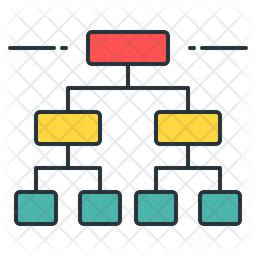


A random forest utilizes a form of decision tree, but instead of each node being selected from the entire data set only a subset of the parameters are taken into consideration as candidates for each nextcoming node. Another difference is that it's built on randomly selected observations (values) rather than the entire set of observations. The forest then exists of a collection of these different decision trees, and uses the average of each tree to decide on the predicted class for a observation.

Take the example on whether a person has a heart disease or not in the table below:

| | | | |  
|----------|----------|---------|---------|
|Age over 40?|Eats junkfood 4+ days a week|Exercises 3+ times a week|**Has heartdisease?**|
|Yes|Yes|No|**Yes**|
|No|Yes|No|**Yes**|
|Yes|No|Yes|**No**|
|No|No|Yes|**No**|

Where the last column represents the target.

For a decision tree, all 3 parameters (age, junkfood habits, exercise habits) would be considered when deciding what node should be the root node. For an arbitrary tree in the random forest, we might only include the first two parameters as the root node, pick the second one and so on. As for the observations, we might include respondent 1 twice, respondent 2 and respondent 4.

When creating decision trees, Gini impurity together with feature analysis is a helpful to use to decide which question/problem is best suited as the next coming node. Gini impurity measures the likelihood of assigning a wrong classification to a random data, and hence a low value indicates a good question for the classification.

For a regular decision tree, the feature (parameter) importance is higher, meaning that the root node feature will have a higher impact on the prediction outcome than nodes further down the tree. With a random forest consisting of multiple trees with subsets of the parameters, the node order will differ from tree to tree, making the prediction less sensitive in this aspect. A regular decision tree might also overfit the data, as the accuracy improves the more splits you create. However, a regular decision tree is easier to interpret than a forest of different trees where both the observations and the parameters included vary for the different trees included in the forest.

**5b)** Explain what makes reinforcement learning different from supervised learning tasks such as regression or classification.

**Answer:** There are a lot of major differences between supervised learning tasks and reinforcement learning, the most evident might be that instead of using sample data like supervised learning tasks, reinforcement learning interacts with the surrounding environment to gain knowledge. So instead of analysing given data and through it generating a general formula, reinforcement learning uses the Markov’s Decision process to interact with the environment in discrete steps through observations and rewards.

This difference makes these two categories better suited for different situations, with RL often used in AI applications since it has an interactive nature, while supervised learning tasks like regression and classification is often used to gain valuable insights from large amount of data and predicting future outcomes based on this historical data. Another differing aspect is the volume of data that’s used to train these two different types of methods, with supervised learning tasks often requiring large volumes of data to produce good results while in reinforcement learning data is generated throughout the process using an initial state and conditions. 


# References
Primer/text based on the following references:
* http://www.cse.chalmers.se/~chrdimi/downloads/book.pdf
* https://github.com/olethrosdc/ml-society-science/blob/master/notes.pdf